# The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [1]:
# Setup:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib_inline
from matplotlib import pyplot as plt


from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from IPython.display import display, Image
import graphviz

import warnings
warnings.filterwarnings('ignore')

# All plots can be displayed on notebooks:
%matplotlib inline

# Make better use of Jupyter Notebook cell width

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [2]:
# Dataset:

!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-11-21 11:02:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  3,92MB/s    in 0,3s    

2022-11-21 11:02:34 (3,92 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
df = pd.read_csv('housing.csv')

# Loading data :

Use only the following columns:

'latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
'population','households','median_income','median_house_value','ocean_proximity'

Fill NAs with 0.

Apply the log tranform to median_house_value.

Do train/validation/test split with 60%/20%/20% distribution.

Use the train_test_split function and set the random_state parameter to 1.

Use DictVectorizer to turn the dataframe into matrices.

In [3]:
df = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
         'population','households','median_income','median_house_value','ocean_proximity']]

In [4]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# Fixing values in ocean_proximity:

df.ocean_proximity = df.ocean_proximity.str.replace('<1H OCEAN','1H OCEAN')
df.ocean_proximity = df.ocean_proximity.str.replace(' ','_')

In [6]:
# Apply the log tranform to median_house_value.

df.median_house_value = np.log1p(df.median_house_value)

In [7]:
# Do train/validation/test split with 60%/20%/20% distribution

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [8]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((16512, 10), (12384, 10), (4128, 10), (4128, 10))

In [9]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [11]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [12]:
# Use DictVectorizer to turn the dataframe into matrices:

from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.fillna(0).to_dict(orient='records')

val_dicts = df_val.fillna(0).to_dict(orient='records')

In [13]:
dv = DictVectorizer(sparse=False)

In [14]:
X_train = dv.fit_transform(train_dicts)

X_val = dv.transform(val_dicts)

# Question 1

- Let's train a decision tree regressor to predict the median_house_value variable.

- Train a model with max_depth=1.
- Which feature is used for splitting the data?

- ocean_proximity=INLAND, total_rooms, latitude, population

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
dt = DecisionTreeRegressor(max_depth=1)

In [17]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [18]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



In [19]:
# Answer is ocean_proximity=INLAND!

# Question 2

- Train a random forest model with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)
- What's the RMSE of this model on validation?

-0.05, 0.25, 0.55, 0.85

In [20]:
rf = RandomForestRegressor(n_estimators=10,
                          random_state=1,
                          n_jobs=-1)

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [22]:
y_pred = rf.predict(X_val)

In [23]:
rmse = mean_squared_error(y_val, y_pred, squared=True)
    
rmse  

0.06041367658654029

# Question 3

- Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.
- After which value of n_estimators does RMSE stop improving?

- 10,50,70,150

In [24]:
scores = []

for i in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=i,
                               n_jobs=-1,
                              random_state=1)
    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=True)
    scores.append((i, rmse))
    
    df_scores = pd.DataFrame(scores, columns=['n_estimators','rmse'])

In [25]:
df_scores

,n_estimators,rmse
0,10,0.060414
1,20,0.057193
2,30,0.055531
3,40,0.055010
4,50,0.054314
5,60,0.054250
6,70,0.054056
7,80,0.054087
8,90,0.053926
9,100,0.053798


(80.0, 150.0)

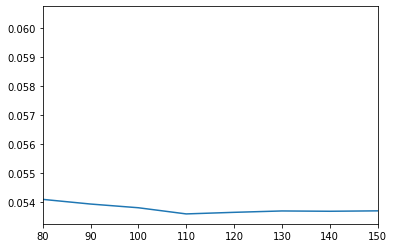

In [26]:
# Plotting:

plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.xlim(80,150 )

In [27]:
# Answer is n_estimators = 110!

# Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
- Fix the random seed: random_state=1
- What's the best max_depth:

-10,15,20,25


In [28]:
scores = []

for n in range(10, 201, 10):
    for d in [10, 15, 20, 25]:
        rf = RandomForestRegressor(n_estimators=n,
                                  max_depth=d,
                                  random_state=1)
        
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        
        rmse = mean_squared_error(y_val, y_pred, squared=True)
        
        scores.append((n, d, rmse))
        
        df_scores = pd.DataFrame(scores, columns=['n_estimators','max_depth','rmse'])

In [29]:
df_scores.sort_values(by='rmse',ascending=True)

,n_estimators,max_depth,rmse
43,110,25,0.053444
47,120,25,0.053456
55,140,25,0.053536
79,200,25,0.053563
67,170,25,0.053569
...,...,...,...
16,50,10,0.062559
12,40,10,0.062983
8,30,10,0.063259
4,20,10,0.063806


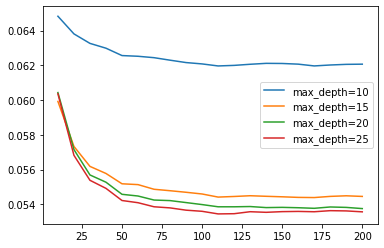

In [30]:
# line plots for max_depts
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f"max_depth={d}")
    
plt.legend()

# Question 5

- We can extract feature importance information from tree-based models.

- At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

- In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

- For this homework question, we'll find the most important feature:

- Train the model with these parametes:
- n_estimators=10,
- max_depth=20,
- random_state=1,
- n_jobs=-1 (optional)
- Get the feature importance information from this model
- What's the most important feature?

- total_rooms,median_income, total_bedrooms, longitude

In [31]:
rf = RandomForestRegressor(n_estimators=10,
                          max_depth=20,
                          random_state=1,
                          n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [32]:
rf.feature_importances_

array([1.61407558e-02, 3.31967386e-02, 1.01333351e-01, 9.63405488e-02,
       3.63224176e-01, 2.76524800e-03, 3.10900842e-01, 3.56806263e-04,
       4.52770519e-04, 4.45219202e-03, 3.09988869e-02, 1.93726028e-02,
       2.04650818e-02])

In [33]:
df_feature_imp = pd.DataFrame()
df_feature_imp['feature'] = dv.get_feature_names()
df_feature_imp['importance'] = rf.feature_importances_

df_feature_imp.sort_values(by='importance', ascending=False)

,feature,importance
4,median_income,0.363224
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101333
3,longitude,0.096341
1,housing_median_age,0.033197
10,population,0.030999
12,total_rooms,0.020465
11,total_bedrooms,0.019373
0,households,0.016141
9,ocean_proximity=NEAR_OCEAN,0.004452


In [34]:
# median_income, ocean_proximity=INLAND

# Question 6
- Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:
- xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
- Now change eta from 0.3 to 0.1.

In [35]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [36]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [84]:
def parse_xgb_ouput(output):
    
    results = []

    for line in output.stdout.strip().split('\n'):

        # split tabs
        num_iter, train, val = line.split('\t')

        # Format 3 values
        num_iter = int(num_iter.strip('[]'))
        train = float(train.strip('train-rsme:'))
        val = float(val.strip('val-rsme:'))

        results.append((num_iter, train, val))

    df_results = pd.DataFrame(results, columns=['n_iter','train', 'val'])

    return df_results

In [82]:
scores = {}

In [86]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'eval_metric': 'auc'
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [90]:
# trying with eta = 0.1

In [88]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

(0.22, 0.25)

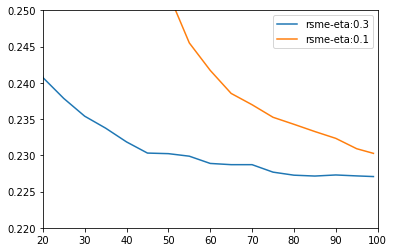

In [89]:
key = f"eta:{xgb_params['eta']}"
scores[key] = parse_xgb_ouput(output)

for key, df_scores in scores.items():
    plt.plot(df_scores.n_iter, df_scores.val, label=f'rsme-{key}')
    
plt.legend()
plt.xlim([20, 100])
plt.ylim([0.22, 0.25])

# As a result eta = 0.1 is better!

In [91]:
########################################################################################################################

In [93]:
# #%%capture output
# evals_result = {}

# etas = [0.1, 0.3]

# for i in etas:
#     xgb_params = {
#         'eta': i,
#         'max_depth': 6,
#         'min_child_weight': 1,

#         'objective': 'reg:squarederror',
#         'nthread': 8,

#         'seed': 1,
#         'verbosity': 1,
#     }


#     model = xgb.train(xgb_params, dtrain,evals_result=evals_result,
#                       num_boost_round=100,
#                       verbose_eval=5,
#                       evals=watchlist)
#     #print(evals_result)
#     df_scores = pd.DataFrame([evals_result['train']['rmse'],evals_result['val']['rmse']]).T
#     df_scores.columns = ['train','val']
#     plt.xlim([20, 100])
#     plt.ylim([0.22, 0.25])
#     df_scores.plot()